In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nimalanparameshwaran","key":"bb32aaf484318377154d5de5e4da631e"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d cashutosh/gender-classification-dataset

 96% 258M/269M [00:02<00:00, 158MB/s]
100% 269M/269M [00:02<00:00, 124MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile('gender-classification-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
import os

In [ ]:
base_dir = "/content/data"
train_dir = "/content/data/Training"
validation_dir = "/content/data/Validation/"

train_male_dir = os.path.join(train_dir, "male")
train_female_dir = os.path.join(train_dir, "female")

valid_male_dir = os.path.join(validation_dir, "male")
valid_female_dir = os.path.join(validation_dir, "female")

In [ ]:
train_male_fnames = os.listdir(train_male_dir)
train_female_fnames = os.listdir(train_female_dir)

valid_male_fnames = os.listdir(valid_male_dir)
valid_female_fnames = os.listdir(valid_female_dir)

print("Training : ")
print(train_male_fnames[:10])
print(train_female_fnames[:10])
print("Validation : ")
print(valid_male_fnames[:10])
print(valid_female_fnames[:10])

Training : 
['108664.jpg.jpg', '094076.jpg.jpg', '186750.jpg.jpg', '123362.jpg.jpg', '126634.jpg.jpg', '114108.jpg.jpg', '099996.jpg.jpg', '092073.jpg.jpg', '104735.jpg.jpg', '104918.jpg.jpg']
['160245.jpg.jpg', '170449.jpg.jpg', '183064.jpg.jpg', '152085.jpg.jpg', '169734.jpg.jpg', '199349.jpg.jpg', '133564.jpg.jpg', '183921.jpg.jpg', '187590.jpg.jpg', '198669.jpg.jpg']
Validation : 
['069075.jpg.jpg', '079857.jpg.jpg', '090007.jpg.jpg', '076990.jpg.jpg', '068645.jpg.jpg', '077234.jpg.jpg', '080219.jpg.jpg', '090534.jpg.jpg', '089325.jpg.jpg', '076908.jpg.jpg']
['115322.jpg.jpg', '130975.jpg.jpg', '113915.jpg.jpg', '122638.jpg.jpg', '113904.jpg.jpg', '116941.jpg.jpg', '118304.jpg.jpg', '130740.jpg.jpg', '121139.jpg.jpg', '116018.jpg.jpg']


In [ ]:
print(f"total training of male is : {len(train_male_fnames)}")
print(f"total training of female is : {len(train_female_fnames)}")
print(f"total validation of male is : {len(valid_male_fnames)}")
print(f"total validation of female is : {len(valid_female_fnames)}")

total training of male is : 23766
total training of female is : 23243
total validation of male is : 5808
total validation of female is : 5841


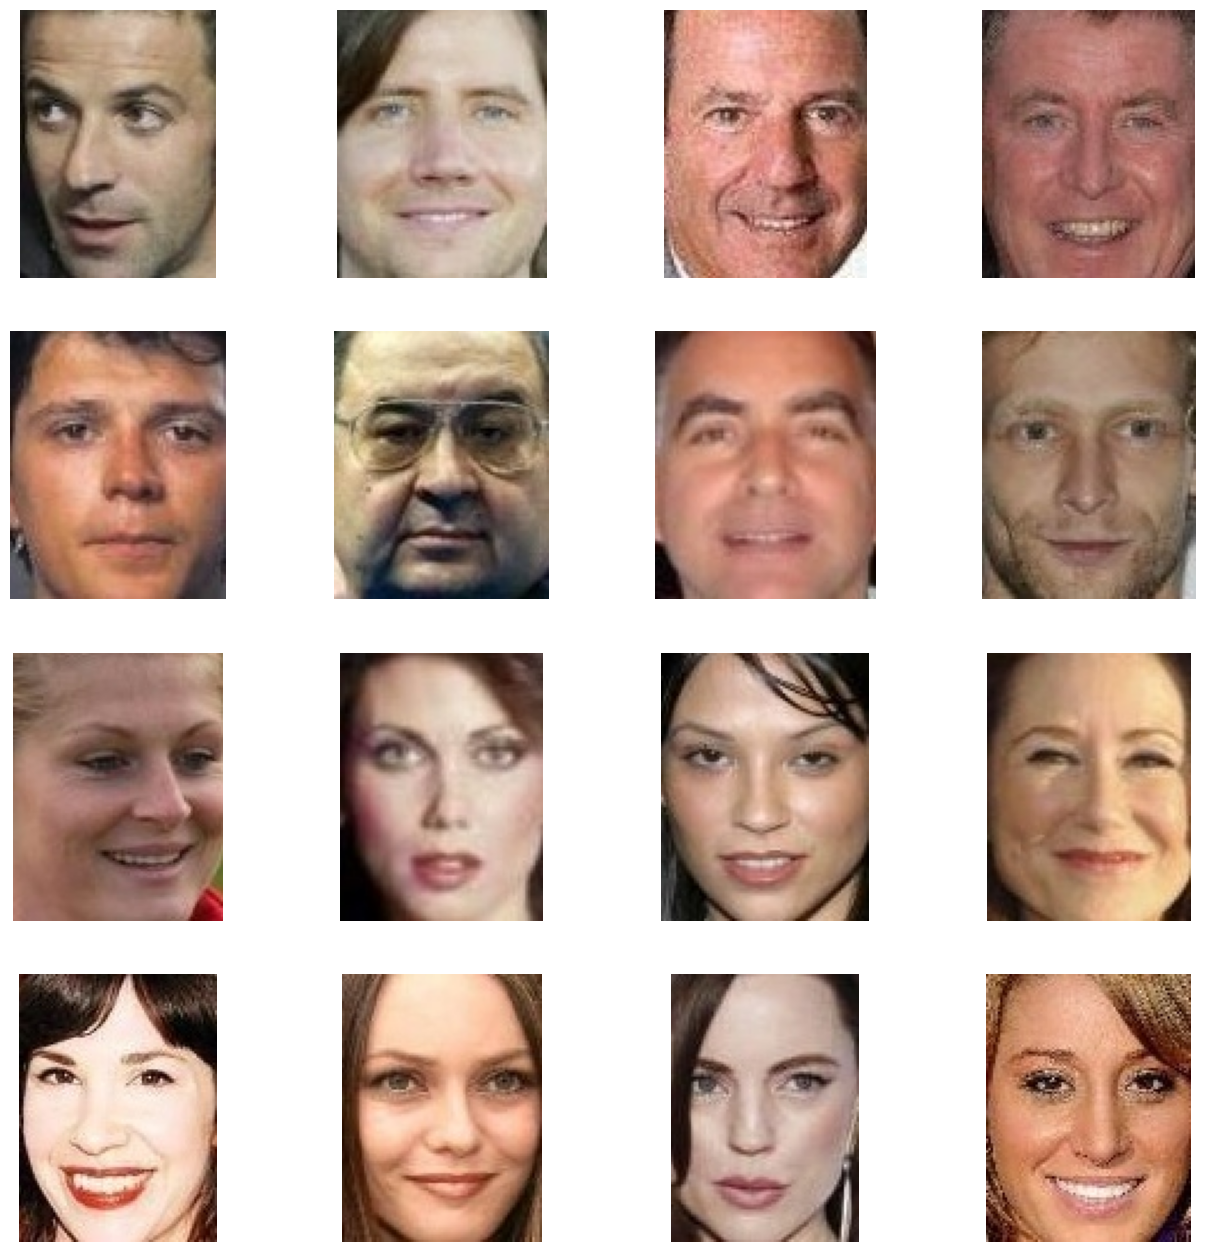

In [ ]:
nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
male_img = [os.path.join(train_male_dir, fname) for fname in train_male_fnames[pic_index-8 : pic_index]]
female_img = [os.path.join(train_female_dir, fname) for fname in train_female_fnames[pic_index-8 : pic_index]]


for i, img in enumerate(male_img + female_img):
    set_subplot = plt.subplot(nrows, ncols, i + 1)
    set_subplot.axis("Off")
    image = mpimg.imread(img)
    plt.imshow(image)
plt.show()


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(84, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

training_generator = train_datagen.flow_from_directory(train_dir,
                                                      target_size=(300, 300),
                                                      batch_size=20,
                                                      class_mode="binary")

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(300, 300),
                                                       batch_size=20,
                                                       class_mode="binary")

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(training_generator, steps_per_epoch=100, epochs=50,
                    validation_data=validation_generator,
                    validation_steps=50,
                    verbose=1)

<ipython-input-14-17006aabd7af>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(training_generator, steps_per_epoch=100, epochs=50,


Epoch 1/50
100/100 [==============================] - 260s 3s/step - loss: 0.5816 - accuracy: 0.6787 - val_loss: 0.5146 - val_accuracy: 0.7450
Epoch 2/50
100/100 [==============================] - 259s 3s/step - loss: 0.4032 - accuracy: 0.8320 - val_loss: 0.3507 - val_accuracy: 0.8740
Epoch 3/50
 57/100 [================>.............] - ETA: 1:38 - loss: 0.3381 - accuracy: 0.8719

KeyboardInterrupt: ignored